# Operación de convolución

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Primero se creará una imagen con 3 canales.

In [ ]:
imgchar_np = np.array([['B','B','B','B','R','R','R','R','B','B','B','B'],
['B','B','B','R','R','R','R','R','R','R','R','B'],
['B','B','C','C','C','P','P','N','P','B','B','B'],
['B','C','P','C','P','P','P','N','P','P','P','B'],
['B','C','P','C','C','P','P','P','C','P','P','P'],
['B','C','C','P','P','P','P','C','C','C','C','B'],
['B','B','B','P','P','P','P','P','P','P','B','B'],
['B','B','R','R','A','R','R','R','B','B','B','B'],
['B','R','R','R','A','R','R','A','R','R','R','B'],
['R','R','R','R','A','A','A','A','R','R','R','R'],
['P','P','R','A','Y','A','A','Y','A','R','R','P'],
['P','P','P','A','A','A','A','A','A','P','P','P'],
['P','P','A','A','A','A','A','A','A','A','P','P'],
['B','B','A','A','A','B','B','A','A','A','B','B'],
['B','C','C','C','B','B','B','B','C','C','C','B'],
['C','C','C','C','B','B','B','B','C','C','C','C']])

diccionario_colores = {'B':(255.,255.,255.), 'R':(255.,0.,0.), 'Y':(255.,255.,0.), 'C':(128.,64.,0.), 'A':(0.,0.,255.), 'N':(0.,0.,0.), 'P':(253., 221., 202.)}
img_rgb = np.zeros((imgchar_np.shape[0], imgchar_np.shape[1], 3))

for i in range(imgchar_np.shape[0]):
    for j in range(imgchar_np.shape[1]):
        tupla_color = diccionario_colores[imgchar_np[i][j]]
        img_rgb[i][j][0] = tupla_color[0]
        img_rgb[i][j][1] = tupla_color[1]
        img_rgb[i][j][2] = tupla_color[2]

# se normalizan los datos para que estén entre 0 y 1:
img_rgb = img_rgb/255.0

Se despliega la imagen de NumPy.

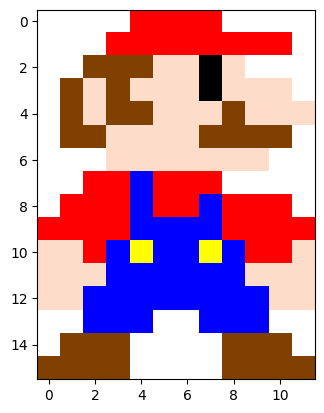

In [ ]:
imgplot = plt.imshow(img_rgb)

Para convolución de imágenes con 3 canales simplemente se debe pasar un filtro (`W`) de 3 dimensiones, donde la profundidad sea 3.

In [ ]:
def conv3d(I, W, b, stride=1):
    h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
    w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
    a = np.zeros((h_s, w_s))
    for i in range(h_s):
        for j in range(w_s):
            I_m = I[i*stride:i*stride + W.shape[0], j*stride:j*stride + W.shape[1]]
            a[i, j] = (I_m * W).sum() + b
    return a

Primero observemos lo que ocurre con un filtro de puros 1's

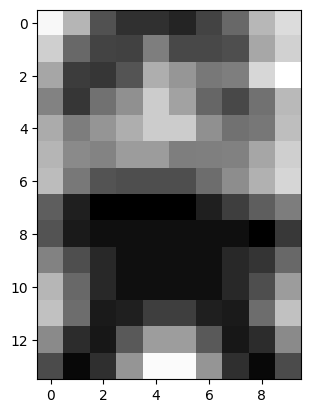

In [ ]:
filtro1 = np.ones((3,3,3))
res_conv1 = conv3d(img_rgb, filtro1, 0, 1)
res_conv1 = res_conv1/res_conv1.max() # normalización
imshow1 = plt.imshow(res_conv1, cmap='gray')

Ahora con otro filtro que tenga otros números.

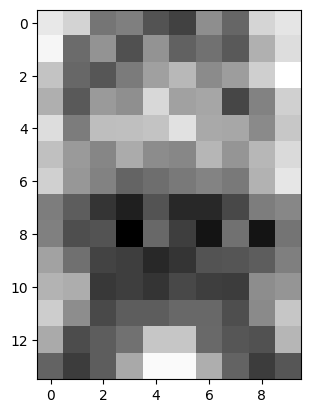

In [ ]:
filtro2 = np.array([[[1,2,3], [1,0,0], [1,2,1]],
                   [[0,1,2], [3,1,1], [1,0,1]],
                   [[3,2,1], [0,0,1], [1,3,2]]])

res_conv2 = conv3d(img_rgb, filtro2, 0, 1)
res_conv2 = res_conv2/res_conv2.max() # normalización
imshow2 = plt.imshow(res_conv2, cmap='gray')